# Numeric Preprocessing (with built-in)

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10.0,101,76.0,48.0,180.0,32.9,0.171,63,0
765,2.0,122,70.0,27.0,0.0,36.8,0.340,27,0
766,5.0,121,72.0,23.0,112.0,26.2,0.245,30,0
767,1.0,126,60.0,0.0,0.0,30.1,0.349,47,1


In [2]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116,74.0,NaN,0.0,25.6,0.201,30,0
6,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0
7,3.0,78,50.0,32.0,88.0,31.0,0.248,26,1
8,10.0,115,0.0,0.0,0.0,35.3,0.134,29,0
9,2.0,197,70.0,45.0,543.0,30.5,0.158,53,1


In [3]:
df.shape

(769, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,769.000000,768.000000,768.000000,768.000000,769.000000,769.000000,769.000000,769.000000
mean,3.846354,120.847854,69.191406,20.574219,79.799479,31.985566,0.471719,33.237971,0.348505
std,3.368283,31.978003,19.194430,15.937859,115.244002,7.881425,0.331142,11.752850,0.476807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#seperate features and class label
features = df.iloc[:, :-1]
class_label = df.iloc[:, -1]

In [11]:
def find_duplicates(data):
    duplicate_rows = data[data.duplicated()]
    return duplicate_rows

duplicate_values = find_duplicates(features)
print("Duplicates values:")
print(duplicate_values)

Duplicates values:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
6          1.0       85           66.0           29.0      0.0  26.6   

   DiabetesPedigreeFunction  Age  
6                     0.351   31  


In [12]:
def remove_duplicates(data):
    unique_data = data.drop_duplicates()
    return unique_data

features = remove_duplicates(features)
print("Data after removing duplicates :")
print(features)

Data after removing duplicates :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0      148           72.0           35.0      0.0  33.6   
1            1.0       85           66.0           29.0      0.0  26.6   
2            8.0      183           64.0            0.0      0.0  23.3   
3            1.0       89           66.0           23.0     94.0  28.1   
4            NaN      137           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
764         10.0      101           76.0           48.0    180.0  32.9   
765          2.0      122           70.0           27.0      0.0  36.8   
766          5.0      121           72.0           23.0    112.0  26.2   
767          1.0      126           60.0            0.0      0.0  30.1   
768          1.0       93           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1   

In [13]:
def find_number_of_missing_values(data): 
    missing_values = data.isnull().sum()

    # Filter out columns with missing values
    missing_values = missing_values[missing_values > 0]
    return missing_values

missing_values = find_number_of_missing_values(features)
# Print columns with missing values and their respective counts
print("Columns with missing values:")
print(missing_values)

Columns with missing values:
Pregnancies      1
BloodPressure    1
SkinThickness    1
Insulin          1
dtype: int64


In [14]:
# 1. Handling missing values
def handle_missing_values(data, strategy='mean'):
    if strategy == 'mean':
        return data.fillna(data.mean())
                    
    elif strategy == 'max':
        return data.fillna(data.max())
                    
    elif strategy == 'min':
        return data.fillna(data.min())
    
    elif strategy == 'zero':
        return data.fillna(0)
    
    elif strategy == 'drop':
        return data.dropna()

features = handle_missing_values(features)
print("Data after handling missing values:")
print(features)

Data after handling missing values:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0       6.000000      148           72.0           35.0      0.0  33.6   
1       1.000000       85           66.0           29.0      0.0  26.6   
2       8.000000      183           64.0            0.0      0.0  23.3   
3       1.000000       89           66.0           23.0     94.0  28.1   
4       3.850065      137           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
764    10.000000      101           76.0           48.0    180.0  32.9   
765     2.000000      122           70.0           27.0      0.0  36.8   
766     5.000000      121           72.0           23.0    112.0  26.2   
767     1.000000      126           60.0            0.0      0.0  30.1   
768     1.000000       93           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

# Numeric Preprocessing (without built-in)

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10.0,101,76.0,48.0,180.0,32.9,0.171,63,0
765,2.0,122,70.0,27.0,0.0,36.8,0.340,27,0
766,5.0,121,72.0,23.0,112.0,26.2,0.245,30,0
767,1.0,126,60.0,0.0,0.0,30.1,0.349,47,1


In [2]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116,74.0,NaN,0.0,25.6,0.201,30,0
6,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0
7,3.0,78,50.0,32.0,88.0,31.0,0.248,26,1
8,10.0,115,0.0,0.0,0.0,35.3,0.134,29,0
9,2.0,197,70.0,45.0,543.0,30.5,0.158,53,1


In [3]:
df.shape

(769, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,769.000000,768.000000,768.000000,768.000000,769.000000,769.000000,769.000000,769.000000
mean,3.846354,120.847854,69.191406,20.574219,79.799479,31.985566,0.471719,33.237971,0.348505
std,3.368283,31.978003,19.194430,15.937859,115.244002,7.881425,0.331142,11.752850,0.476807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.600000,0.626000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#seperate features and class label
features = df.iloc[:, :-1]
class_label = df.iloc[:, -1]

In [6]:
import pandas as pd

def find_duplicates(data):
    duplicate_rows = []
    seen_rows = set()  # To track rows that we have already seen

    # Iterate through each row in the DataFrame
    for index, row in data.iterrows():
        # Convert the row to a tuple to make it hashable
        row_tuple = tuple(row)
        
        # Check if this row tuple has already been seen
        if row_tuple in seen_rows:
            # Append the duplicate row as a Series object
            duplicate_rows.append(row.values)
        else:
            seen_rows.add(row_tuple)  # Add the row tuple to the set of seen rows
    
    # Create a DataFrame from the list of duplicate rows
    columns = data.columns
    duplicate_df = pd.DataFrame(duplicate_rows, columns=columns)
    
    return duplicate_df


duplicate_values = find_duplicates(features)
print("Duplicates values:")
print(duplicate_values)

Duplicates values:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          1.0     85.0           66.0           29.0      0.0  26.6   

   DiabetesPedigreeFunction   Age  
0                     0.351  31.0  


In [7]:
def remove_duplicates(data):
    seen_rows = set()
    unique_data = []
    
    for index, row in data.iterrows():
        row_tuple = tuple(row)
        if row_tuple not in seen_rows:
            seen_rows.add(row_tuple)
            unique_data.append(row)
    
    # Convert list of rows back to DataFrame
    unique_data_df = pd.DataFrame(unique_data, columns=data.columns)
    return unique_data_df

features = remove_duplicates(features)
print("Data after removing duplicates :")
print(features)

Data after removing duplicates :
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            NaN    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
764         10.0    101.0           76.0           48.0    180.0  32.9   
765          2.0    122.0           70.0           27.0      0.0  36.8   
766          5.0    121.0           72.0           23.0    112.0  26.2   
767          1.0    126.0           60.0            0.0      0.0  30.1   
768          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1 

In [8]:
features.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33.0
5,5.0,116.0,74.0,NaN,0.0,25.6,0.201,30.0
7,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0
8,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0
9,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0
10,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0


In [9]:
 def find_number_of_missing_values(data): 
    # Create an empty dictionary to store column names and their respective counts of missing values
    missing_values = {}

    # Iterate through each column in the DataFrame
    for column in df.columns:
        # Count the number of missing values in the column
        missing_count = sum(1 for value in df[column] if pd.isna(value))

        # If there are missing values in the column, add it to the dictionary
        if missing_count > 0:
            missing_values[column] = missing_count

    # Print columns with missing values and their respective counts
    print("Columns with missing values:")
    for column, count in missing_values.items():
        print(f"{column}: {count}")

missing_values = find_number_of_missing_values(features)

Columns with missing values:
Pregnancies: 1
BloodPressure: 1
SkinThickness: 1
Insulin: 1


In [10]:
import pandas as pd
import numpy as np

def handle_missing_values(data, strategy='mean'):
    num_cols = data.shape[1]  # Number of columns
    filled_data = data.copy()  # Create a copy to modify
    
    if strategy == 'mean':
        # Calculate column means
        col_means = [np.mean(data.iloc[:, col]) for col in range(num_cols)]
        
        # Replace NaN values with column means
        for col in range(num_cols):
            col_mean = col_means[col]
            for row in range(len(data)):
                if pd.isna(data.iloc[row, col]):
                    filled_data.iloc[row, col] = col_mean
                    
    elif strategy == 'max':
        # Calculate column max values
        col_max = [np.max(data.iloc[:, col]) for col in range(num_cols)]
        
        # Replace NaN values with column max values
        for col in range(num_cols):
            col_max_value = col_max[col]
            for row in range(len(data)):
                if pd.isna(data.iloc[row, col]):
                    filled_data.iloc[row, col] = col_max_value
                    
    elif strategy == 'min':
        # Calculate column min values
        col_min = [np.min(data.iloc[:, col]) for col in range(num_cols)]
        
        # Replace NaN values with column min values
        for col in range(num_cols):
            col_min_value = col_min[col]
            for row in range(len(data)):
                if pd.isna(data.iloc[row, col]):
                    filled_data.iloc[row, col] = col_min_value
                    
    elif strategy == 'zero':
        # Replace NaN values with 0
        for col in range(num_cols):
            for row in range(len(data)):
                # Check if the value is NaN
                if pd.isna(data.iloc[row, col]):
                    # If it is NaN, replace it with 0
                    filled_data.iloc[row, col] = 0
    
    elif strategy == 'drop':
        # Drop rows with NaN values
        filled_data = data.dropna()
    
    return filled_data

features = handle_missing_values(features,'zero')
print("Data after handling missing values:")
print(features)

Data after handling missing values:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
764         10.0    101.0           76.0           48.0    180.0  32.9   
765          2.0    122.0           70.0           27.0      0.0  36.8   
766          5.0    121.0           72.0           23.0    112.0  26.2   
767          1.0    126.0           60.0            0.0      0.0  30.1   
768          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  

# Naive Bayes 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv('Social_Network_Ads.csv')

In [2]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB(priors=[0.4, 0.6], var_smoothing=1e-9)
classifier.fit(X_train, y_train)

GaussianNB(priors=[0.4, 0.6])

In [5]:
#changing hyperparameter values
from sklearn.naive_bayes import GaussianNB

# Example hyperparameter values
custom_priors = [0.3, 0.7]  # Custom priors for classes
custom_var_smoothing = 1e-8  # Custom var_smoothing value

# Initialize Gaussian Naive Bayes classifier with custom hyperparameters
classifier = GaussianNB(priors=custom_priors, var_smoothing=custom_var_smoothing)

# Assuming X_train and y_train are your training data
classifier.fit(X_train, y_train)


GaussianNB(priors=[0.3, 0.7], var_smoothing=1e-08)

In [6]:
y_pred = classifier.predict(X_test)

In [7]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [9]:
cm

array([[53, 15],
       [ 1, 31]], dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score
print("The accuracy score is:", accuracy_score(y_pred, y_test))

The accuracy score is: 0.84


In [11]:
from sklearn.metrics import classification_report
print("classification_report:")
print( classification_report(y_pred, y_test))

classification_report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        54
           1       0.97      0.67      0.79        46

    accuracy                           0.84       100
   macro avg       0.87      0.83      0.83       100
weighted avg       0.87      0.84      0.83       100



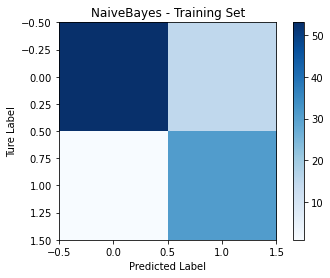

In [12]:
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('NaiveBayes - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('Ture Label')
plt.colorbar()

# Show the plot
plt.show()

# SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# converting gender column to numeric
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
dataset['Gender']=label_encoder.fit_transform(dataset['Gender'])
dataset['Gender'].unique()

array([1, 0])

In [4]:
# to include gender
X = dataset.iloc[:, [1, 3]].values
y = dataset.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
# X = dataset.iloc[:, [2, 3]].values
# y = dataset.iloc[:,4].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [12]:
cm

array([[66,  2],
       [20, 12]], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score
print("The accuracy score is:", accuracy_score(y_pred, y_test))

The accuracy score is: 0.78


In [14]:
from sklearn.metrics import classification_report
print("classification_report:")
print( classification_report(y_pred, y_test))

classification_report:
              precision    recall  f1-score   support

           0       0.97      0.77      0.86        86
           1       0.38      0.86      0.52        14

    accuracy                           0.78       100
   macro avg       0.67      0.81      0.69       100
weighted avg       0.89      0.78      0.81       100



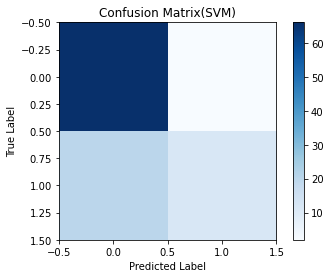

In [15]:
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Confusion Matrix(SVM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.colorbar()

# Show the plot
plt.show()

# Decision Tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [4]:
y_pred = classifier.predict(X_test)

In [5]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [7]:
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

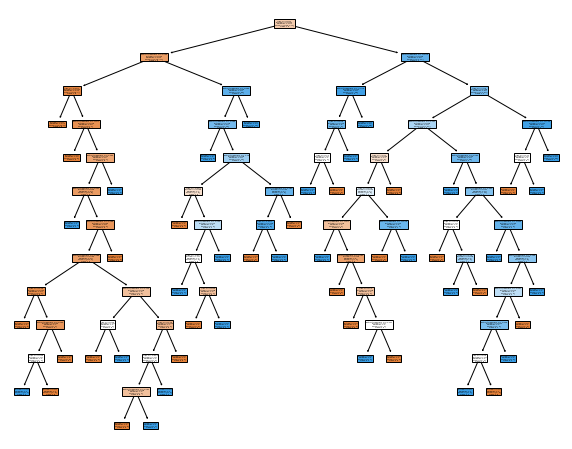

In [8]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(classifier, feature_names=['Age', 'EstimatedSalary'], class_names=['0', '1'], filled=True)
plt.show()

In [9]:
from sklearn.metrics import accuracy_score
print("The accuracy score is:", accuracy_score(y_pred, y_test))

The accuracy score is: 0.91


# k- means

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clustering.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


     LoanAmount  ApplicantIncome
0         128.0             4583
1          66.0             3000
2         120.0             2583
3         141.0             6000
4          95.0             2333
..          ...              ...
376       128.0             5703
377       108.0             3232
378        71.0             2900
379        40.0             4106
380       133.0             4583

[381 rows x 2 columns]


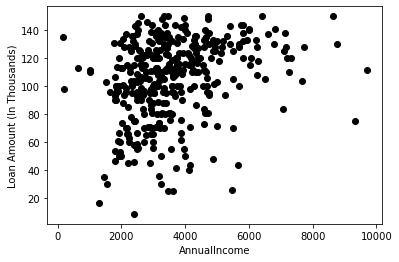

In [3]:
X = data[["LoanAmount","ApplicantIncome"]]
print(X)
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

     LoanAmount  ApplicantIncome
177        54.0             1811
356       123.0             3400
178        89.0             3158


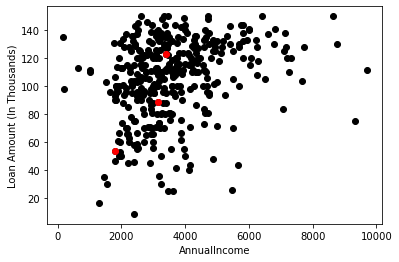

In [4]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
print(Centroids)
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [5]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    print(X)
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print("Difference :: ",diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[

     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2772.987559  1183.010566  1425.533584   
1          66.0             3000  1189.060554   404.040840   159.665275   
2         120.0             2583   774.816107   817.005508   575.835046   
3         141.0             6000  4189.903340  2600.062307  2842.475682   
4          95.0             2333   523.607678  1067.367322   825.021818   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3892.703431  2303.005428  2545.298804   
377       108.0             3232  1422.025668   168.668314    76.400262   
378        71.0             2900  1089.132682   502.696728   258.627145   
379        40.0             4106  2295.042701   710.862153   949.265506   
380       133.0             4583  2773.125493  1183.042265  1425.679136   

     Cluster  
0          2  
1          3  
2          3  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2599.613816    17.513761  1704.302876   
1          66.0             3000  1016.694482  1576.515120   126.145662   
2         120.0             2583   600.020341  1992.859431   296.493456   
3         141.0             6000  4016.663320  1424.451489  3121.346316   
4          95.0             2333   349.377080  2242.907975   545.942470   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3719.538485  1127.269905  2824.220178   
377       108.0             3232  1248.467000  1343.849433   353.157151   
378        71.0             2900   916.602744  1676.345268    36.952184   
379        40.0             4106  2122.998977   475.330448  1228.626496   
380       133.0             4583  2599.687990    22.171610  1704.388423   

     Cluster  
0          2  
1          3  
2          3  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2625.655891   430.170091  1504.205284   
1          66.0             3000  1042.738581  2013.504000    87.298913   
2         120.0             2583   626.031321  2429.944040   496.286140   
3         141.0             6000  4042.706266   987.438097  2921.245222   
4          95.0             2333   375.421876  2680.002221   746.044515   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3745.582653   690.209596  2624.117668   
377       108.0             3232  1274.509681  1780.945666   153.076861   
378        71.0             2900   942.647966  2113.369924   181.864244   
379        40.0             4106  2149.043488   909.935141  1028.939690   
380       133.0             4583  2625.728944   430.363976  1504.296194   

     Cluster  
0          2  
1          3  
2          3  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2530.075741   727.344372  1325.189554   
1          66.0             3000   947.211880  2310.756473   260.891311   
2         120.0             2583   530.526998  2727.236326   675.191807   
3         141.0             6000  3947.125246   690.249331  2742.224634   
4          95.0             2333   279.839776  2977.300826   925.066712   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3650.000785   392.975617  2445.095094   
377       108.0             3232  1178.928902  2078.244696    26.235021   
378        71.0             2900   847.113113  2410.637815   359.591974   
379        40.0             4106  2053.511470  1206.579291   850.442100   
380       133.0             4583  2530.150159   727.449382  1325.287188   

     Cluster  
0          2  
1          3  
2          1  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2456.428592   916.816995  1193.759503   
1          66.0             3000   873.746849  2500.268499   391.303813   
2         120.0             2583   456.841448  2916.751630   806.654871   
3         141.0             6000  3873.481890   500.829382  2610.778271   
4          95.0             2333   206.227045  3166.825840  1056.524363   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3576.364302   203.551966  2313.639204   
377       108.0             3232  1105.285836  2267.767530   157.549273   
378        71.0             2900   773.635229  2600.155457   490.576241   
379        40.0             4106  1980.022252  1395.870781   719.331920   
380       133.0             4583  2456.498321   916.891071  1193.871988   

     Cluster  
0          2  
1          3  
2          1  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2391.604104  1097.337812  1076.469713   
1          66.0             3000   808.938663  2680.752016   508.307242   
2         120.0             2583   392.132611  3097.279134   923.876240   
3         141.0             6000  3808.655619   320.663446  2493.487813   
4          95.0             2333   141.390455  3347.345886  1173.811440   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3511.535157    25.486299  2196.350672   
377       108.0             3232  1040.458935  2448.291718   274.774372   
378        71.0             2900   708.823480  2780.648704   607.748447   
379        40.0             4106  1915.202286  1576.132677   602.814361   
380       133.0             4583  2391.676555  1097.401793  1076.585444   

     Cluster  
0          3  
1          3  
2          1  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2361.665833  1200.618375  1013.073027   
1          66.0             3000   779.065948  2784.028628   571.547685   
2         120.0             2583   362.206258  3200.567426   987.280028   
3         141.0             6000  3778.718164   217.787034  2430.083137   
4          95.0             2333   111.472690  3450.634420  1237.220188   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3481.599302    81.345639  2132.942865   
377       108.0             3232  1010.521686  2551.580838   338.183450   
378        71.0             2900   678.947338  2883.928905   671.066932   
379        40.0             4106  1885.313205  1679.321161   539.824644   
380       133.0             4583  2361.737294  1200.675581  1013.195962   

     Cluster  
0          3  
1          3  
2          1  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2330.724190  1318.174299   950.508436   
1          66.0             3000   748.150721  2901.583015   634.012099   
2         120.0             2583   331.327446  3318.131577  1049.836977   
3         141.0             6000  3747.776034   101.682966  2367.513116   
4          95.0             2333    80.536199  3568.199784  1299.791712   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3450.656496   198.422049  2070.371576   
377       108.0             3232   979.579423  2669.146450   400.749210   
378        71.0             2900   648.030225  3001.486734   733.583362   
379        40.0             4106  1854.386346  1796.791663   477.845203   
380       133.0             4583  2330.796441  1318.224571   950.636934   

     Cluster  
0          3  
1          3  
2          1  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2296.080572  1518.254398   865.683856   
1          66.0             3000   713.525665  3101.653429   718.739500   
2         120.0             2583   296.785907  3518.221008  1134.647281   
3         141.0             6000  3713.131426   103.838251  2282.681830   
4          95.0             2333    45.896669  3768.289500  1384.623731   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3416.010440   398.350169  1985.539430   
377       108.0             3232   944.934723  2869.237180   485.573335   
378        71.0             2900   613.403577  3201.562861   818.362049   
379        40.0             4106  1819.748945  1996.737787   394.154790   
380       133.0             4583  2296.154263  1518.296121   865.819885   

     Cluster  
0          3  
1          1  
2          1  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2248.340580  1632.358349   793.505611   
1          66.0             3000   665.807526  3215.769507   790.855672   
2         120.0             2583   249.245592  3632.333481  1206.814894   
3         141.0             6000  3665.389687   216.458022  2210.497297   
4          95.0             2333     2.293858  3882.407286  1456.808566   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3368.266318   512.413029  1913.354385   
377       108.0             3232   897.193398  2983.353476   557.752802   
378        71.0             2900   565.683754  3315.680256   890.511491   
379        40.0             4106  1772.012172  2110.810806   323.423499   
380       133.0             4583  2248.416612  1632.393687   793.648932   

     Cluster  
0          3  
1          1  
2          1  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2220.548362  1788.478731   729.822597   
1          66.0             3000   638.052471  3371.882128   854.489534   
2         120.0             2583   221.577387  3788.458372  1270.499517   
3         141.0             6000  3637.597070   372.082433  2146.804974   
4          95.0             2333    29.711893  4038.532397  1520.502668   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3340.473307   668.512904  1849.660536   
377       108.0             3232   869.400959  3139.479243   621.445100   
378        71.0             2900   537.927832  3471.796534   954.171899   
379        40.0             4106  1744.238862  2266.851360   261.610757   
380       133.0             4583  2220.624986  1788.509599   729.975109   

     Cluster  
0          3  
1          1  
2          1  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2175.604106  1816.594404   678.579570   
1          66.0             3000   593.232006  3399.995246   905.688718   
2         120.0             2583   176.819542  3816.574502  1321.771710   
3         141.0             6000  3592.653800   400.153050  2095.543910   
4          95.0             2333    74.652995  4066.648206  1571.770096   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3295.531785   696.626457  1798.395030   
377       108.0             3232   824.457263  3167.595305   672.716765   
378        71.0             2900   493.107734  3499.910381  1005.395906   
379        40.0             4106  1699.366792  2294.951503   212.442625   
380       133.0             4583  2175.679781  1816.624710   678.745721   

     Cluster  
0          3  
1          1  
2          1  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2166.440089  1844.324439   662.775964   
1          66.0             3000   584.113362  3427.720193   921.479057   
2         120.0             2583   167.675361  3844.304396  1337.591406   
3         141.0             6000  3583.490465   427.850373  2079.731672   
4          95.0             2333    83.822569  4094.377001  1587.585710   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3286.369557   724.355505  1782.580668   
377       108.0             3232   815.293783  3195.324653   688.534948   
378        71.0             2900   483.989919  3527.636274  1021.194690   
379        40.0             4106  1690.230449  2322.661588   197.436247   
380       133.0             4583  2166.514968  1844.354555   662.947919   

     Cluster  
0          3  
1          1  
2          1  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2135.719414  1872.354013   623.323354   
1          66.0             3000   553.420265  3455.742856   960.921974   
2         120.0             2583   137.312360  3872.333416  1377.029999   
3         141.0             6000  3552.768538   455.854894  2040.277034   
4          95.0             2333   114.528350  4122.404365  1627.037885   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3255.645956   752.384798  1743.127214   
377       108.0             3232   784.572189  3223.352791   727.982095   
378        71.0             2900   453.298813  3555.660044  1060.644844   
379        40.0             4106  1659.512760  2350.667937   161.284538   
380       133.0             4583  2135.795967  1872.384189   623.499851   

     Cluster  
0          3  
1          1  
2          1  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2110.550395  1901.089918   586.830411   
1          66.0             3000   528.297012  3484.469898   997.404258   
2         120.0             2583   112.533910  3901.068334  1413.521304   
3         141.0             6000  3527.598978   484.571989  2003.777769   
4          95.0             2333   139.694127  4151.137036  1663.536911   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3230.475798   781.121085  1706.627853   
377       108.0             3232   759.402879  3252.086479   764.478875   
378        71.0             2900   428.178761  3584.388374  1097.135460   
379        40.0             4106  1634.359864  2379.377003   129.428461   
380       133.0             4583  2110.627711  1901.120403   587.013835   

     Cluster  
0          3  
1          1  
2          1  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2102.034474  1901.089918   577.200630   
1          66.0             3000   519.805451  3484.469898  1007.030329   
2         120.0             2583   104.172226  3901.068334  1423.155963   
3         141.0             6000  3519.083082   484.571989  1994.144066   
4          95.0             2333   148.209914  4151.137036  1673.171517   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3221.959999   781.121085  1696.993513   
377       108.0             3232   750.886965  3252.086479   774.113813   
378        71.0             2900   419.688901  3584.388374  1106.764672   
379        40.0             4106  1625.854686  2379.377003   121.383824   
380       133.0             4583  2102.111806  1901.120403   577.387116   

     Cluster  
0          3  
1          1  
2          1  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2097.817914  1901.089918   572.319093   
1          66.0             3000   515.567634  3484.469898  1011.915068   
2         120.0             2583   100.133328  3901.068334  1428.019849   
3         141.0             6000  3514.865607   484.571989  1989.268905   
4          95.0             2333   152.424564  4151.137036  1678.043388   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3217.741288   781.121085  1692.120467   
377       108.0             3232   746.670073  3252.086479   778.982397   
378        71.0             2900   415.450770  3584.388374  1111.646808   
379        40.0             4106  1621.621382  2379.377003   117.704971   
380       133.0             4583  2097.896306  1901.120403   572.502804   

     Cluster  
0          3  
1          1  
2          1  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C
<ipython-input-5-c5be8678ca82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


     LoanAmount  ApplicantIncome            1            2            3  \
0         128.0             4583  2089.423626  1901.089918   562.503865   
1          66.0             3000   507.198199  3484.469898  1021.726616   
2         120.0             2583    91.941108  3901.068334  1437.839809   
3         141.0             6000  3506.471348   484.571989  1979.449780   
4          95.0             2333   160.818835  4151.137036  1687.863346   
..          ...              ...          ...          ...          ...   
376       128.0             5703  3209.347128   781.121085  1682.300724   
377       108.0             3232   738.275788  3252.086479   788.802660   
378        71.0             2900   407.083260  3584.388374  1121.461453   
379        40.0             4106  1613.237862  2379.377003   109.934108   
380       133.0             4583  2089.502032  1901.120403   562.690727   

     Cluster  
0          3  
1          1  
2          1  
3          2  
4          1  
..       

<ipython-input-5-c5be8678ca82>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


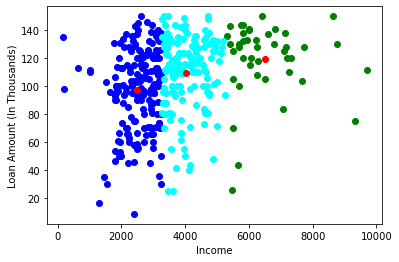

In [6]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

# k-means(built-in)

In [1]:
#K-means Clustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


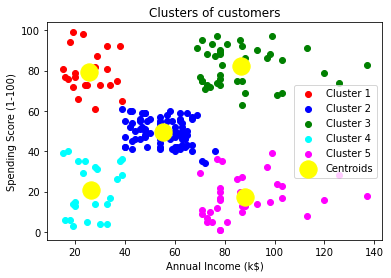

In [3]:
X = dataset.iloc[:, [3, 4]].values

# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Hierarchical Clistering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


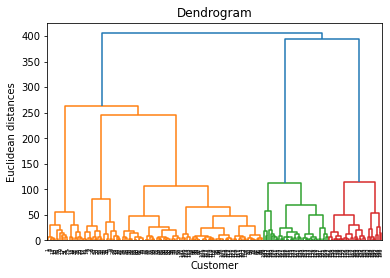

In [3]:
x = dataset.iloc[:,[3,4]].values

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Euclidean distances")
plt.show()

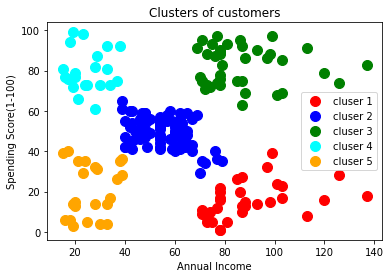

In [4]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = "red", label = "cluser 1")
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = "blue", label = "cluser 2")
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = "green", label = "cluser 3")
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = "cyan", label = "cluser 4")
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = "orange", label = "cluser 5")
plt.title("Clusters of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()

# Density Based Clustering

In [1]:
#Density Based Clustering
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Read data from CSV file
data = pd.read_csv('blobs.csv')
data

,0,1
0,8.622185,1.935796
1,-4.736710,-7.970958
2,9.621222,0.925423
3,6.162095,-0.273254
4,8.697488,-1.057452
...,...,...
995,8.993880,2.203768
996,-5.082768,-9.644539
997,-6.252268,-8.412482
998,-5.479154,-10.536955


In [2]:
# Extract the features (assuming your CSV file has columns 'Feature1' and 'Feature2')
X = data.iloc[:,[0,1]].values
X

array([[  8.62218539,   1.93579579],
       [ -4.73670958,  -7.97095765],
       [  9.62122205,   0.92542315],
       ...,
       [ -6.2522678 ,  -8.412482  ],
       [ -5.479154  , -10.53695547],
       [  6.12055883,   0.96896287]])

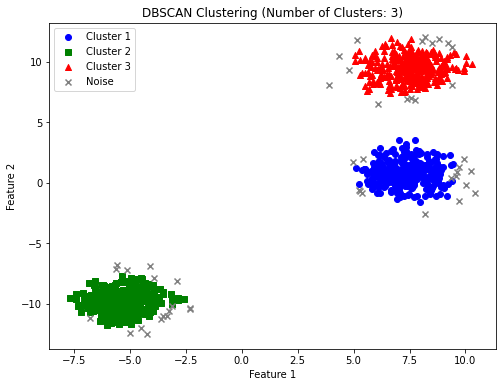

In [3]:
# DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5)
y_db = db.fit_predict(X)

# Number of clusters in labels, ignoring noise if present (-1)
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
     
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[y_db == 0][:, 0], X[y_db == 0][:, 1], c='blue', marker='o', label='Cluster 1')
plt.scatter(X[y_db == 1][:, 0], X[y_db == 1][:, 1], c='green', marker='s', label='Cluster 2')
plt.scatter(X[y_db == 2][:, 0], X[y_db == 2][:, 1], c='red', marker='^', label='Cluster 3')
plt.scatter(X[y_db == -1][:, 0], X[y_db == -1][:, 1], c='gray', marker='x', label='Noise')
plt.legend(loc='best')
plt.title(f"DBSCAN Clustering (Number of Clusters: {n_clusters_})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Grid based clustering

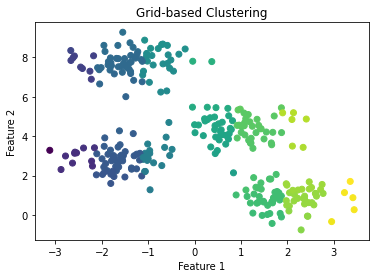

In [1]:
#Grid Based Clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=.60, random_state=0)

# Set the grid size (you can adjust this based on your data distribution)
grid_size = 1.0

# Get the minimum and maximum values for x and y coordinates
x_min, x_max = data[:, 0].min(), data[:, 0].max()
y_min, y_max = data[:, 1].min(), data[:, 1].max()


# Create a grid by defining intervals using the minimum and maximum values
x_grid = np.arange(x_min, x_max + grid_size, grid_size)
y_grid = np.arange(y_min, y_max + grid_size, grid_size)


# Initialize labels array with zeros
labels = np.zeros(data.shape[0], dtype=int)
 

# Assign each data point to a grid cell based on its coordinates
for i, point in enumerate(data):
    x, y = point
    x_label = np.searchsorted(x_grid, x) - 1
    y_label = np.searchsorted(y_grid, y) - 1
    labels[i] = x_label * len(y_grid) + y_label


# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('Grid-based Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()   

# Linear regression for single variable

In [1]:
#Linear regression using single variable
import pandas as pd 
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv("homeprices.csv")

In [2]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,595000
4,4000,760000
5,4100,810000


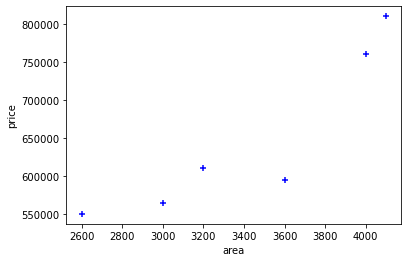

In [3]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color = 'blue', marker = '+')

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)
reg.coef_

array([167.30954677])

In [5]:
reg.intercept_

76692.3818707813

In [6]:
reg.predict([[6800]])

array([1214397.29990357])

# Linear regression using multiple variables

In [1]:
#Linear regression using multiple variable
import pandas as pd 
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv("homeprices_multiple.csv")

In [2]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [3]:
df.bedrooms.median()

4.0

In [4]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())

In [5]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [6]:
x = df.iloc[:, [0,1,2]].values
y = df.iloc[:, 3].values
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

In [7]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [8]:
reg.intercept_

221323.00186540408

In [9]:
reg.predict([[2600, 3, 30]])

array([485900.45388978])